<a href="https://colab.research.google.com/github/Animesh-roy100/Tweet-Analysis/blob/main/Tweet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
a = files. upload()

Saving Corona_NLP_test.csv to Corona_NLP_test (1).csv


# Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow
from tensorflow import keras
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding,Dropout,LSTM
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

# Data Preprocessing

In [ ]:
data = pd.read_csv("Corona_NLP_test.csv")
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
# Convert the Sentiment column to numbers
data['Sentiment']=LabelEncoder().fit_transform(data['Sentiment'])
# No need for the location column
data = data.dropna(axis=1)
data.head()

,UserName,ScreenName,TweetAt,OriginalTweet,Sentiment
0,1,44953,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,0
1,2,44954,02-03-2020,When I couldn't find hand sanitizer at Fred Me...,4
2,3,44955,02-03-2020,Find out how you can protect yourself and love...,1
3,4,44956,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,2
4,5,44957,03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,3


In [ ]:
data.shape

(3798, 5)

In [ ]:
data.isnull().any()

UserName         False
ScreenName       False
TweetAt          False
OriginalTweet    False
Sentiment        False
dtype: bool

In [ ]:
data.isnull().sum()

UserName         0
ScreenName       0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   TweetAt        3798 non-null   object
 3   OriginalTweet  3798 non-null   object
 4   Sentiment      3798 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 148.5+ KB


In [ ]:
data.describe

<bound method NDFrame.describe of       UserName  ...  Sentiment
0            1  ...          0
1            2  ...          4
2            3  ...          1
3            4  ...          2
4            5  ...          3
...        ...  ...        ...
3793      3794  ...          4
3794      3795  ...          2
3795      3796  ...          3
3796      3797  ...          0
3797      3798  ...          1

[3798 rows x 5 columns]>

#Split the Data into Dependable and Non-Dependable Variable

In [ ]:
x = data.drop('Sentiment',axis=1)
y = data['Sentiment'].values
y = y.reshape(-1,1)

In [ ]:
x.head()

,UserName,ScreenName,TweetAt,OriginalTweet
0,1,44953,02-03-2020,TRENDING: New Yorkers encounter empty supermar...
1,2,44954,02-03-2020,When I couldn't find hand sanitizer at Fred Me...
2,3,44955,02-03-2020,Find out how you can protect yourself and love...
3,4,44956,02-03-2020,#Panic buying hits #NewYork City as anxious sh...
4,5,44957,03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...


In [ ]:
y

array([[0],
       [4],
       [1],
       ...,
       [3],
       [0],
       [1]])

In [ ]:
nltk.download('stopwords')
message=x.copy()
message.reset_index(inplace=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
ps=PorterStemmer()
corpus=[]
for i in range(len(x)):
  review = re.sub('[^a-zA-Z]',' ',message['OriginalTweet'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
corpus[0]

'trend new yorker encount empti supermarket shelv pictur wegman brooklyn sold onlin grocer foodkick maxdeliveri coronaviru fear shopper stock http co gr pcrlwh http co ivmkmsqdt'

In [ ]:
voc_size=50000
# Generate value for a perticular word
one_hot_r=[one_hot(word,voc_size) for word in corpus]

In [ ]:
one_hot_r[0]

[20637,
 36303,
 19653,
 16527,
 16411,
 37650,
 16057,
 6881,
 8464,
 41072,
 22474,
 27536,
 2549,
 1619,
 35441,
 43440,
 11600,
 42324,
 7355,
 12861,
 32566,
 48418,
 38757,
 12861,
 32566,
 29231]

In [ ]:
sent_length=30
# Convert each sentence to same length
input=pad_sequences(one_hot_r,padding='pre',maxlen=sent_length)

# Creating The Model

In [ ]:
final_input=np.array(input)
final_output=np.array(y)

In [ ]:
dim=40
model=Sequential()
model.add(Embedding(voc_size,dim,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(80))
model.add(Dropout(0.3))
model.add(Dense(1,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

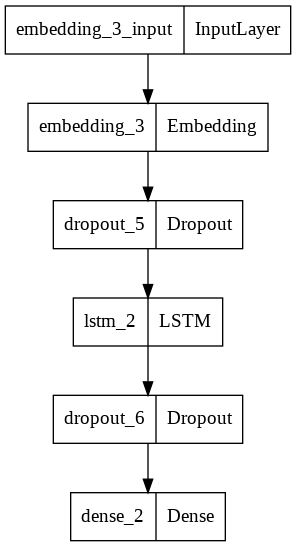

In [ ]:
plot_model(model)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(final_input, final_output, test_size=0.33, random_state=42)

In [ ]:
y_pred=model.predict_classes(x_test)

In [ ]:
val=metrics.accuracy_score(y_test,y_pred)
print("accuracy is =", str(val*100)+" %")